In [1]:
import sys
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
root="/home/jovyan/work"
results_path=root+"/results/"
procesed_results_path=root+"/notebooks/ProjectAnalysis/TestAnalysis/results/"

# ExperimentalResults


## Load data

In [2]:
apache_projects = pd.read_csv(results_path+'ApacheResults.csv') 
github_projects = pd.read_csv(results_path+'GitHubResults.csv') 
many4j_projects = pd.read_csv(results_path+'Many4JResults.csv') 
all_projects    = pd.read_csv(results_path+'AllResults.csv') 

## Change days to years

In [3]:
apache_projects['Age'] = apache_projects['Age'].map(lambda days: days/365.) 
github_projects['Age'] = github_projects['Age'].map(lambda days: days/365.) 
many4j_projects['Age'] = many4j_projects['Age'].map(lambda days: days/365.) 
all_projects['Age'] = all_projects['Age'].map(lambda days: days/365.) 

## 1.1 Absolute results for All Projects

In [4]:
def describeAbsoluteResults(dataset, name, data):
    testable_percent = round(100*(data['Testable commits'].sum() / data['Test buildable commits'].sum()), 2)
    return [
        dataset,
        len(data.index),
        data['Age'].sum(),
        data['LoC'].sum(),
        data['Total Commits'].sum(),
        data['Source buildable commits'].sum(),
        data['Test buildable commits'].sum(),
        data['Testable commits'].sum(),
    ]    

In [5]:
apache_absolute = describeAbsoluteResults("Apache", "All", apache_projects)
github_absolute = describeAbsoluteResults("GitHub", "All", github_projects)
many4j_absolute = describeAbsoluteResults("Many4J", "All", many4j_projects)
all_absolute    = describeAbsoluteResults("All", "All", all_projects)

all_absolute_df = pd.DataFrame(
    [ apache_absolute, github_absolute, many4j_absolute, all_absolute ]
, columns = [
        "Dataset",
        "# projects",
        "Age",
        "LoC",
        "# commits",
        "Source buildable commits",
        "Test buildable commit",
        "Testable commits"
]).round(decimals=2).set_index('Dataset')
all_absolute_df.T#.astype(int)

Dataset,Apache,GitHub,Many4J,All
# projects,15.00,12.00,84.00,111.00
Age,211.88,134.58,774.19,1120.65
LoC,977097.00,1367392.00,12278459.00,14622948.00
# commits,66056.00,51099.00,599805.00,716960.00
Source buildable commits,16560.00,36548.00,98317.00,151425.00
Test buildable commit,12349.00,30716.00,84742.00,127807.00
Testable commits,4843.00,14411.00,38658.00,57912.00


## 1.2 Mean and median results for All Projects

In [6]:
alpha = 1e-3
def isNormalDistribution(name, data):
    k2, p = stats.normaltest(list(data.values))
    
    if p < alpha: 
        print("{:s} is NOT a normal distribution: p = {:g}".format(name, p))
    else: 
        print("{:s} is a normal distribution: p = {:g}".format(name, p))

In [7]:
def checkDistribution(dataset, data):
    isNormalDistribution(dataset+"-Age",data['Age'])
    isNormalDistribution(dataset+"-LoC",data['LoC'])
    isNormalDistribution(dataset+"-Total Commits",data['Total Commits'])
    isNormalDistribution(dataset+"-Source buildable",data['Source buildable commits'])
    isNormalDistribution(dataset+"-Test buildable",data['Test buildable commits'])
    isNormalDistribution(dataset+"-Testable",data['Testable commits'])

In [8]:
def describeResultsWithMeans(dataset, name, data):
    return [
        'Mean',
        dataset,
        data['Age'].mean(),
        data['LoC'].mean(),
        data['Total Commits'].mean(),
        data['Source buildable commits'].mean(),
        data['Test buildable commits'].mean(),
        data['Testable commits'].mean(),
    ]

In [9]:
def describeResultsWithMedian(dataset, name, data):
    return [
        'Median',
        dataset,
        data['Age'].median(),
        data['LoC'].median(),
        data['Total Commits'].median(),
        data['Source buildable commits'].median(),
        data['Test buildable commits'].median(),
        data['Testable commits'].median(),
    ]

In [10]:
def describeResultsWithStd(dataset, name, data):
    return [
        'Std',
        dataset,
        data['Age'].std(),
        data['LoC'].std(),
        data['Total Commits'].std(),
        data['Source buildable commits'].std(),
        data['Test buildable commits'].std(),
        data['Testable commits'].std(),
    ]

In [11]:
checkDistribution("Apache",apache_projects)
checkDistribution("GitHub",github_projects)
checkDistribution("Many4J",many4j_projects)

Apache-Age is a normal distribution: p = 0.523326
Apache-LoC is NOT a normal distribution: p = 4.40847e-08
Apache-Total Commits is a normal distribution: p = 0.0571384
Apache-Source buildable is a normal distribution: p = 0.0401155
Apache-Test buildable is a normal distribution: p = 0.110863
Apache-Testable is NOT a normal distribution: p = 2.76283e-08
GitHub-Age is a normal distribution: p = 0.588079
GitHub-LoC is NOT a normal distribution: p = 1.30146e-05
GitHub-Total Commits is a normal distribution: p = 0.329492
GitHub-Source buildable is a normal distribution: p = 0.385474
GitHub-Test buildable is a normal distribution: p = 0.231392
GitHub-Testable is a normal distribution: p = 0.0679576
Many4J-Age is a normal distribution: p = 0.340418
Many4J-LoC is a normal distribution: p = nan
Many4J-Total Commits is NOT a normal distribution: p = 6.03352e-19
Many4J-Source buildable is NOT a normal distribution: p = 4.19807e-18
Many4J-Test buildable is NOT a normal distribution: p = 1.68358e-1

/opt/conda/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/conda/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [12]:
all_means_df = pd.DataFrame(
    [ 
        describeResultsWithMeans("Apache", "All", apache_projects), 
        describeResultsWithMedian("Apache", "All", apache_projects), 
        describeResultsWithMeans("GitHub", "All", github_projects),
        describeResultsWithMedian("GitHub", "All", github_projects), 
        describeResultsWithMeans("Many4J", "All", many4j_projects),
        describeResultsWithMedian("Many4J", "All", many4j_projects),
        describeResultsWithMeans("All", "All", all_projects),
        describeResultsWithStd("All", "All", all_projects)
    ]
, columns = [
        "",
        "Dataset",
        "Age",
        "LoC",
        "Total commits",
        "Source buildable commits",
        "Test buildable commits",
        "Testable commits",

]).set_index(['Dataset', '']).round(decimals=2)#.astype(int)
all_means_df.T

Dataset                     Apache               GitHub               Many4J  \
                              Mean    Median       Mean    Median       Mean   
Age                          14.13     14.57      11.22     10.98       9.22   
LoC                       65139.80  35977.00  113949.33  87504.00  147933.24   
Total commits              4403.73   3971.00    4258.25   3294.00    7140.54   
Source buildable commits   1104.00    913.00    3045.67   2709.50    1170.44   
Test buildable commits      823.27    464.00    2559.67   2135.00    1008.83   
Testable commits            322.87    139.00    1200.92    554.50     460.21   

Dataset                                   All             
                            Median       Mean        Std  
Age                           9.51      10.10       4.21  
LoC                       27703.00  132935.89  236024.28  
Total commits              2396.50    6459.10   10245.52  
Source buildable commits    581.50    1364.19    1807.05  
Test buildable commits      366.50    1151.41    1764.68  
Testable commits             90.00     521.73    1161.36

## 1.3 Relative results for All Projects

In [13]:
def describeRelativeResults(dataset, name, data):
    return [
        'Mean',
        dataset,
        100*data['Source buildability'].mean(),
        100*data['Test buildability'].mean(),
        100*data['Testability_C'].mean(),
        100*data['Testability_B'].mean(),
        100*data['Testability_T'].mean(),
    ]

In [14]:
def describeRelativeResultsStd(dataset, name, data):
    return [
        'Std',
        dataset,
        100*data['Source buildability'].std(),
        100*data['Test buildability'].std(),
        100*data['Testability_C'].std(),
        100*data['Testability_B'].std(),
        100*data['Testability_T'].std(),
    ]

In [15]:
def describeRelativeResultsWithMedian(dataset, name, data):
     return [
        'Median',
        dataset,
        100*data['Source buildability'].median(),
        100*data['Test buildability'].median(),
        100*data['Testability_C'].median(),
        100*data['Testability_B'].median(),
        100*data['Testability_T'].median(),
    ]

In [16]:
def checkDistributionRelative(dataset, data):
    isNormalDistribution(dataset+"-SourceBuildability",data['Source buildability'])
    isNormalDistribution(dataset+"-TestBuildability",data['Test buildability'])
    isNormalDistribution(dataset+"-Total Commits",data['Total Commits'])
    isNormalDistribution(dataset+"-Testability_C",data['Testability_C'])
    isNormalDistribution(dataset+"-Testability_B",data['Testability_B'])
    isNormalDistribution(dataset+"-Testability_T",data['Testability_C'])

In [17]:
checkDistributionRelative("Apache",apache_projects)
checkDistributionRelative("GitHub",github_projects)
checkDistributionRelative("Many4J",many4j_projects)

Apache-SourceBuildability is a normal distribution: p = 0.0605774
Apache-TestBuildability is a normal distribution: p = 0.107879
Apache-Total Commits is a normal distribution: p = 0.0571384
Apache-Testability_C is a normal distribution: p = 0.0257866
Apache-Testability_B is a normal distribution: p = 0.230826
Apache-Testability_T is a normal distribution: p = 0.0257866
GitHub-SourceBuildability is a normal distribution: p = 0.0526686
GitHub-TestBuildability is NOT a normal distribution: p = 3.14822e-05
GitHub-Total Commits is a normal distribution: p = 0.329492
GitHub-Testability_C is a normal distribution: p = 0.172613
GitHub-Testability_B is a normal distribution: p = 0.0673238
GitHub-Testability_T is a normal distribution: p = 0.172613
Many4J-SourceBuildability is NOT a normal distribution: p = 0.000415627
Many4J-TestBuildability is NOT a normal distribution: p = 9.38751e-09
Many4J-Total Commits is NOT a normal distribution: p = 6.03352e-19
Many4J-Testability_C is NOT a normal distr

/opt/conda/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/conda/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [18]:
all_relative_df = pd.DataFrame(
    [ 
        describeRelativeResults("Apache", "All", apache_projects),
        describeRelativeResultsWithMedian("Apache", "All", apache_projects),
        describeRelativeResults("GitHub", "All", github_projects),
        describeRelativeResultsWithMedian("GitHub", "All", github_projects),
        describeRelativeResults("Many4J", "All", many4j_projects),
        describeRelativeResultsWithMedian("Many4J", "All", many4j_projects),
        describeRelativeResults("All", "All", all_projects),
        describeRelativeResultsWithMedian("All", "All", all_projects)
    ]
, columns = [
        "",
        "Dataset",
        "Source buildability",
        "Test buildability", # of buildable source
        "Testability_C",
        "Testability_B",
        "Testability_T"
]).round(decimals=2).set_index(['Dataset', ''])
all_relative_df.T

Dataset             Apache        GitHub        Many4J           All       
                      Mean Median   Mean Median   Mean Median   Mean Median
Source buildability  29.65  25.24  69.35  75.84  36.64  31.35  39.23  36.33
Test buildability    71.71  82.09  82.44  95.25  65.63  90.85  68.27  89.25
Testability_C         7.46   5.05  31.54  24.04  17.04   2.76  17.31   5.05
Testability_B        29.13  19.01  41.23  50.94  34.97  13.91  34.86  17.63
Testability_T        39.49  31.27  44.86  55.94  40.25  21.17  40.65  27.82

## 1.4 Relative results per dataset

In [19]:
def viewDistributionOfResults(dataset):
    dataset_relative_df = dataset[
        ['Source buildability', 'Test buildability', 'Testability_C','Testability_B', 'Testability_C']
    ]
    return dataset_relative_df.describe().T

### Apache

In [20]:
viewDistributionOfResults(apache_projects)

,count,mean,std,min,25%,50%,75%,max
Source buildability,15.0,0.296549,0.181675,0.100473,0.184422,0.252439,0.362434,0.740038
Test buildability,15.0,0.717056,0.307255,0.000000,0.585821,0.820856,0.968025,1.000000
Testability_C,15.0,0.074624,0.092991,0.000000,0.002798,0.050512,0.088831,0.302389
Testability_B,15.0,0.291329,0.300224,0.000000,0.006183,0.190068,0.518237,0.841922
Testability_C,15.0,0.074624,0.092991,0.000000,0.002798,0.050512,0.088831,0.302389


### GitHub

In [21]:
viewDistributionOfResults(github_projects)

,count,mean,std,min,25%,50%,75%,max
Source buildability,12.0,0.693543,0.218531,0.392484,0.478959,0.758437,0.884268,0.942532
Test buildability,12.0,0.824392,0.288187,0.000645,0.794768,0.952486,0.986447,0.999693
Testability_C,12.0,0.315387,0.316517,0.000000,0.000000,0.240406,0.625397,0.817625
Testability_B,12.0,0.412270,0.354459,0.000000,0.000000,0.509382,0.712775,0.889744
Testability_C,12.0,0.315387,0.316517,0.000000,0.000000,0.240406,0.625397,0.817625


### Many4J

In [22]:
viewDistributionOfResults(many4j_projects)

,count,mean,std,min,25%,50%,75%,max
Source buildability,84.0,0.366352,0.320603,0.0,0.035473,0.313531,0.555401,1.000000
Test buildability,84.0,0.656326,0.421626,0.0,0.076065,0.908499,0.990315,1.000000
Testability_C,84.0,0.170395,0.236498,0.0,0.000000,0.027566,0.283265,0.935506
Testability_B,84.0,0.349681,0.383278,0.0,0.000000,0.139064,0.702680,1.000000
Testability_C,84.0,0.170395,0.236498,0.0,0.000000,0.027566,0.283265,0.935506


## 2. Plot of results

In [23]:
def plotProjects(dataset, name, figsize=(6,3)):
    
    print("Max %d"%dataset['Total Commits'].max())
    print("Min %d"%dataset['Total Commits'].min())
    
    df = dataset[
        ['Project', 'Total Commits', 'Source buildable commits', 'Test buildable commits', 'Testable commits']
    ].set_index('Project').sort_values(by=['Total Commits'], ascending=False)
    
    fig, ax = plt.subplots(figsize=figsize)
    bar_width = 0.9
    index = np.arange(len(df.index))
    #index = df.index
    
    ax.bar(index,df["Total Commits"], bar_width, label="Total Commits", zorder=1, color="tab:blue")
    ax.bar(index,df["Source buildable commits"], bar_width, label="Source buildable commits", zorder=1, color="orange")
    ax.bar(index,df["Test buildable commits"], bar_width, label="Test buildable commits", zorder=1,color="purple")
    ax.bar(index,df["Testable commits"], bar_width, label="Testable commits", zorder=1,color="limegreen")
    
    ax.set_xlabel('Projects')
    ax.set_ylabel('# commits')
    ax.get_xaxis().set_ticks([])
    
    #ax.set_xticklabels(df.index, rotation=90, ha='right')
    
    plt.legend()
    #plt.tight_layout()
    plt.savefig("latex_figures/"+name+".pdf")
    plt.show()

### 2.1 Apache

Max 11377
Min 1465


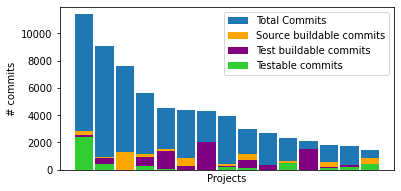

In [24]:
plotProjects(apache_projects, "Apache")

### 2.2 GitHub

Max 8356
Min 1637


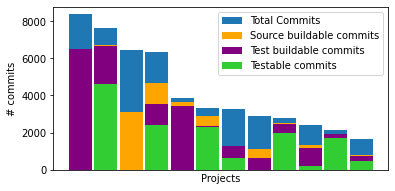

In [25]:
plotProjects(github_projects, "GitHub")

## 2.3 Many4J

Max 71543
Min 4686


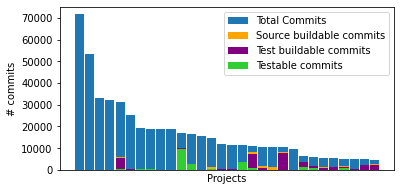

In [26]:
plotProjects(many4j_projects.sort_values(by=['Total Commits'], ascending=False)[0:30], "Many4j 1-30")

Max 4626
Min 1195


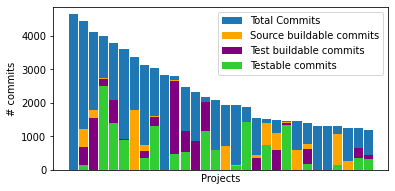

In [27]:
plotProjects(many4j_projects.sort_values(by=['Total Commits'], ascending=False)[30:60], "Many4j 31-60")

Max 1188
Min 31


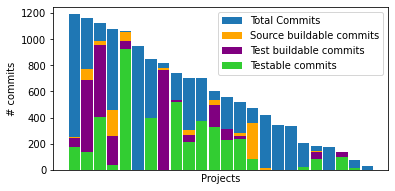

In [28]:
plotProjects(many4j_projects.sort_values(by=['Total Commits'], ascending=False)[60:85], "Many4j 61-84")

## 3. Overview of results

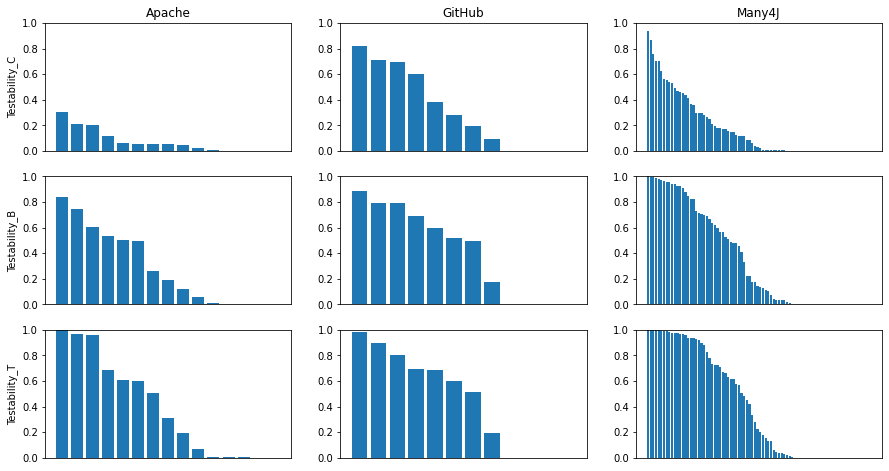

In [29]:
def setChart(ax, dataset, metric, ylabel=False, xlabel=""):
    aux_df = dataset.sort_values(by=metric, ascending=False).reset_index(drop=True)
    ax.bar(aux_df.index, aux_df[metric])
    ax.set_ylim(0,1)
    
    ax.get_xaxis().set_ticks([])
    
    if ylabel: ax.set(ylabel=metric)
    if xlabel != "": ax.set_title(xlabel)

fig, (ax1, ax2, ax3) = plt.subplots(3, 3, figsize=(15,8))

setChart(ax1[0], apache_projects, "Testability_C", ylabel=True, xlabel="Apache")
setChart(ax1[1], github_projects, "Testability_C", xlabel="GitHub")
setChart(ax1[2], many4j_projects, "Testability_C", xlabel="Many4J")
setChart(ax2[0], apache_projects, "Testability_B", ylabel=True)
setChart(ax2[1], github_projects, "Testability_B")
setChart(ax2[2], many4j_projects, "Testability_B")
setChart(ax3[0], apache_projects, "Testability_T", ylabel=True)
setChart(ax3[1], github_projects, "Testability_T")
setChart(ax3[2], many4j_projects, "Testability_T")